# NFL Draft Analysis

Question:
- What are the key factors that contribute to draft position:


# Analyses Utilized:

- multivariate linear regression
- Exploratory Factor Analysis to identify factors
- Multivariate Linear Regression / MANOVA to show key variables

In [1]:
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport

import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline

import seaborn as sns

from scipy import stats

# Load Data

### Sources:

https://www.reddit.com/r/NFL_Draft/comments/8cxcxj/2018_nfl_draft_data/

https://docs.google.com/spreadsheets/d/1sFcj1W38gR_Bg3BQz8lZSuFrRQr0BDk8K066ctrxrOA/edit#gid=1586587221

https://www.sports-reference.com/cfb/years/2018-standings.html

In [2]:
data = pd.read_csv("./nfl_draft_clean.csv")

In [3]:
oline = pd.read_csv("./oline_normalized.csv")
wrs = pd.read_csv("./wrs_normalized.csv")
rbs = pd.read_csv("./rbs_normalized.csv")

In [4]:
idx_cols = ['year', 'pos', 'player', 'college', 'team']
measureable_cols = ['height_inches', 'weight', 'forty', 'vertical', 'bench',
                    'broad', 'threecone', 'shuttle']
receiving_cols = ['receiving.games', 'receiving.rec.td', 'receiving.rec.yards',
                  'receiving.receptions', 'receiving.rush.att', 'receiving.rush.td',
                  'receiving.rush.yds', 'receiving.scrim.plays', 'receiving.scrim.tds',
                  'receiving.scrim.yds'
]
rushing_cols = ['rushing.games', 'rushing.rec.td', 'rushing.rec.yards', 'rushing.receptions',
                'rushing.rush.att', 'rushing.rush.td', 'rushing.rush.yds',
                'rushing.scrim.plays', 'rushing.scrim.tds', 'rushing.scrim.yds', 'rushing.seasons'
]
conf_cols = [x for x in data.columns if x.startswith("conf_")]
team_cols_std = ["win_pct", "wins", "losses", "ppg_off", "ppg_def", "srs", "sos"]
team_cols_no_std = ["ap_rank_std"]
team_cols = team_cols_std + team_cols_no_std + conf_cols
dep_cols = ["pick", "pick_std"]

oline_cols = idx_cols + dep_cols + measureable_cols + team_cols
endog_oline = "pick_std"
exog_oline = measureable_cols + ["win_pct", "ppg_off", "ppg_def", "ap_rank_std", "sos"] + conf_cols
wr_cols = idx_cols + dep_cols + measureable_cols + receiving_cols + team_cols
endog_wrs = "pick_std"
exog_wrs = (measureable_cols +
            ["receiving.games", 'receiving.rec.td', 'receiving.rec.yards', 'receiving.receptions'] +
            ["win_pct", "ppg_off", "ppg_def", "ap_rank_std", "sos"] +
            conf_cols)
rb_cols = idx_cols + dep_cols + measureable_cols + rushing_cols + team_cols
endog_rbs = "pick_std"
exog_rbs = (measureable_cols +
            ['rushing.games', 'rushing.rec.yards', 'rushing.receptions', 'rushing.rush.att', 'rushing.scrim.tds', 'rushing.scrim.yds'] +
            ["win_pct", "ppg_off", "ppg_def", "ap_rank_std", "sos"] +
            conf_cols)

## Normal Test

In [5]:
def test_normality(data, cols):
    ntresults = {}
    for col in cols:
        ntresults[col] = stats.normaltest(data[col], nan_policy="omit")
    return pd.DataFrame(ntresults, index=["s", "p"])

In [9]:
stats.normaltest?

In [10]:
oline_nt_results = test_normality(oline, [endog_oline] + exog_oline)
oline_nt_results.T.style.applymap(lambda x: "background-color: red" if x < 1e-3 else "")

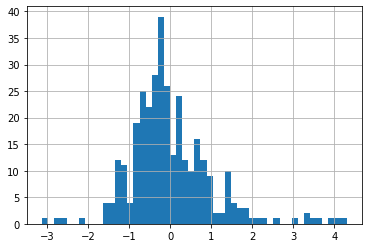

In [18]:
oline.weight.hist(bins=50)

In [7]:
wrs_nt_results = test_normality(wrs, [endog_wrs] + exog_wrs)
wrs_nt_results.T.style.applymap(lambda x: "background-color: red" if x < 1e-3 else "")

In [8]:
rbs_nt_results = test_normality(rbs, [endog_rbs] + exog_rbs)
rbs_nt_results.T.style.applymap(lambda x: "background-color: red" if x < 1e-3 else "")

## EDA


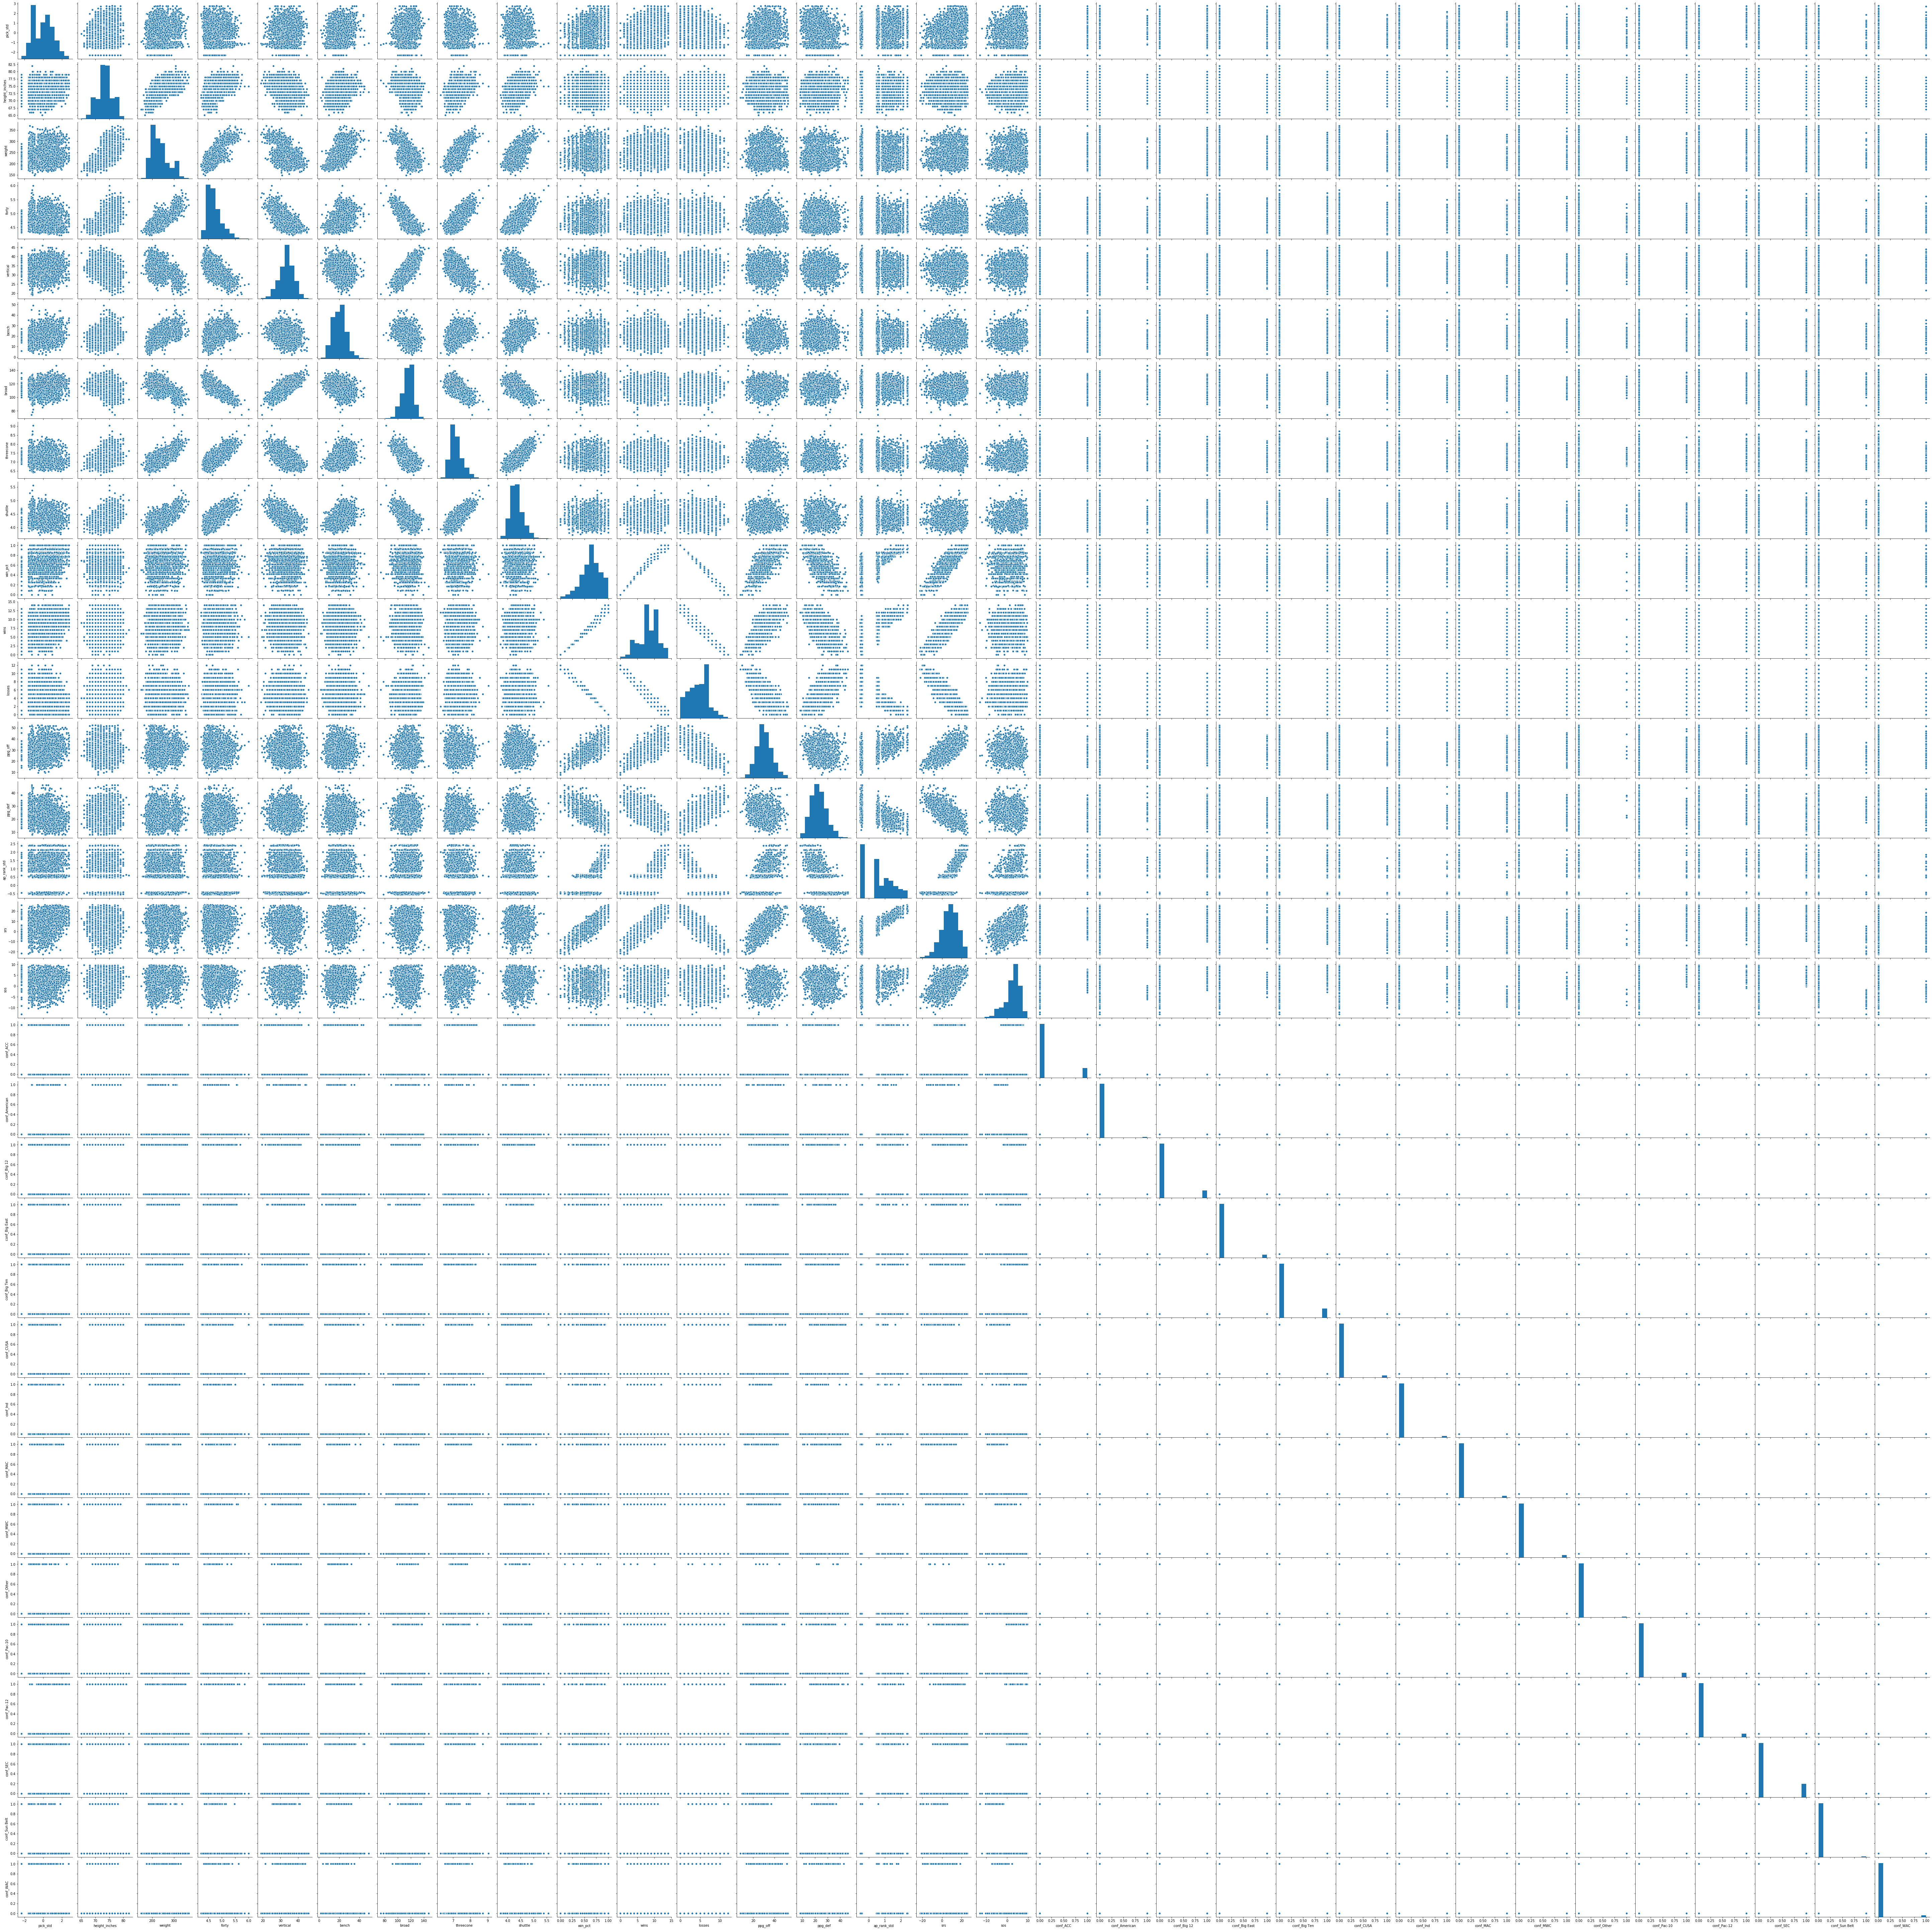

In [9]:
sns.pairplot(data[["pick_std"] + measureable_cols + team_cols])

In [ ]:
profile_data = (nfl_draft[["year", "pick"] + measureables]
                .reset_index(drop=True)
                .pipe(transform_pick)
                .pipe(filter_all, undrafted=False)
                .reset_index(drop=True))
profile = ProfileReport(profile_data, title='Pandas Profiling Report', html={'style':{'full_width':True}})

In [ ]:
profile

In [ ]:
nfl_draft.head()

In [ ]:
nfl_draft.columns

In [ ]:
nfl_draft.dtypes

# Exploratory Data Analyis

In [ ]:
(nfl_draft.groupby("year")
 .apply(lambda x: x.loc[x.pick >= 300].pick.count())

In [ ]:
nfl_draft.groupby("year")["pick"].count()

In [ ]:
nfl_draft.pick.value_counts().head(10)

In [ ]:
nfl_draft.pos.value_counts()

In [ ]:
nfl_draft.missing_combine_vals.value_counts()

In [ ]:
nfl_draft.pick.hist(bins=50)

Stats vs Season

In [ ]:
qbs.plot(x="passing.games", y="passing.attempts", kind="scatter")

Decision: Normalize statistics by games / seasons

In [ ]:
rbs.plot(x="rushing.games", y="rushing.rush.att", kind="scatter")

In [ ]:
wrs.plot(x="receiving.games", y="receiving.receptions", kind="scatter")